# Crawler de vagas de emprego da Avature


## Pegando os dominios validos
###  foi feito um dump da busca por subdominios usando o site <https://app.pentest-tools.com>, esse foi o que trouxe mais resultados, busquei também no <https://dnsdumpster.com/> por exemplo.

In [26]:
! pip install --upgrade certifi
! pip install requests


  Attempting uninstall: certifi
    Found existing installation: certifi 2025.10.5
    Uninstalling certifi-2025.10.5:
      Successfully uninstalled certifi-2025.10.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seleniumbase 4.41.12 requires websockets>=15.0.1; python_version >= "3.9", but you have websockets 13.1 which is incompatible.


In [1]:
import json
import requests
import certifi

In [2]:
payload_subdomains = json.load(open('Subdomain_Finder-avature.net-20260131-0256.json', 'r'))
subdomains = [sub[0] for sub in payload_subdomains['results'][0]['output_data'] if sub[1] != "Did not resolve."]
print(len(subdomains))
print()
print(subdomains[0:5])

416

['tesco.avature.net', 'mobiletrust2.avature.net', 'delta.avature.net', 'tademobfrazier.avature.net', 'primero.avature.net']


### Using the Tor proxy for cost efficiency and anonymity
### <https://infosecwriteups.com/configuring-tor-with-python-1a90fc1c246f>

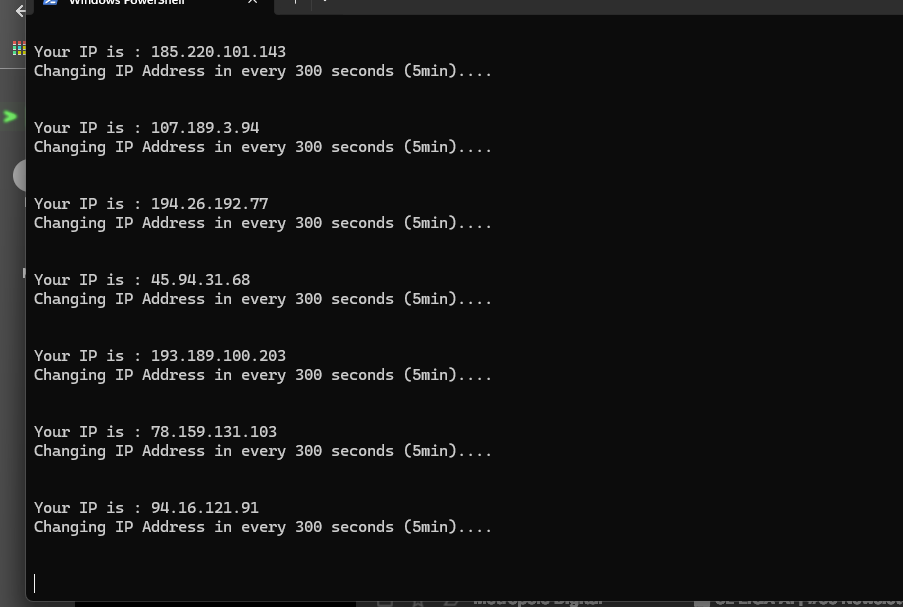

In [ ]:
payload_subdomains = json.load(open('subdomains_valids_all.json', 'r'))
subdomains = [sub for sub in payload_subdomains]
print(len(subdomains))
print()
print(subdomains[0:5])

In [ ]:
import requests
import certifi
from concurrent.futures import ThreadPoolExecutor, as_completed

proxies = {
    'http': 'socks5://127.0.0.1:9050',
    'https': 'socks5://127.0.0.1:9050'
}

subdomains_valids = []

def check_subdomain(subdomain):
    try:
        response = requests.get(
            f'https://{subdomain}/careers/',
            proxies=proxies,
            allow_redirects=False,
            verify=certifi.where(),
            timeout=10
        )
        print(subdomain, '- status code:', response.status_code)

        if response.status_code != 404:
            return subdomain
    except Exception as e:
        print(f'Erro no subdominio {subdomain}, {e}')
    
    return None


with ThreadPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(check_subdomain, s) for s in subdomains]

    for future in as_completed(futures):
        result = future.result()
        if result:
            subdomains_valids.append(result)


tesco.avature.net - status code: 301
delta.avature.net - status code: 302
mobiletrust2.avature.net - status code: 403
tademobfrazier.avature.net - status code: 404
primero.avature.net - status code: 302
bupaanz.avature.net - status code: 404
cba.avature.net - status code: 404
auspost.avature.net - status code: 301
djcshudson.avature.net - status code: 302
monadelphous.avature.net - status code: 301
pe.avature.net - status code: 404
mgl.avature.net - status code: 301
santos.avature.net - status code: 301
sparknz.avature.net - status code: 301
fonterrakf.avature.net - status code: 301
regis.avature.net - status code: 302
co.avature.net - status code: 404
a2milkkf.avature.net - status code: 200
sandboxzungfu.avature.net - status code: 302
jardinematheson.avature.net - status code: 200
hkland.avature.net - status code: 404
zungfu.avature.net - status code: 302
cyclecarriage.avature.net - status code: 200
dfiretailgroup.avature.net - status code: 302
jrg.avature.net - status code: 302
cs-cd

In [7]:
print(len(subdomains_valids))
print(subdomains_valids[0:10])

with open('subdomains_valids.json', 'w') as arq:
    arq.write(json.dumps(subdomains_valids, indent=4)) 

181
['tesco.avature.net', 'delta.avature.net', 'mobiletrust2.avature.net', 'primero.avature.net', 'auspost.avature.net', 'djcshudson.avature.net', 'monadelphous.avature.net', 'mgl.avature.net', 'santos.avature.net', 'sparknz.avature.net']
